In [13]:
import os
import cv2
import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import imgaug.augmenters as iaa

# Set up directories for male and female images
male_dir = "E:\python files\Male"
female_dir = "E:\python files\Female"

# Preprocessing function to resize and preprocess images
def preprocess(img):
    img = cv2.resize(img, (100, 100))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img.flatten()
    return img

# Load male and female images into arrays and preprocess them
male_images = []
for img_file in os.listdir(male_dir):
    img = cv2.imread(os.path.join(male_dir, img_file))
    img = preprocess(img)
    male_images.append(img)

female_images = []
for img_file in os.listdir(female_dir):
    img = cv2.imread(os.path.join(female_dir, img_file))
    img = preprocess(img)
    female_images.append(img)

# Combine male and female images into a single dataset and labels array
X = np.concatenate((male_images, female_images))
y = np.concatenate((np.ones(len(male_images)), np.zeros(len(female_images))))

# Apply image augmentations to the dataset
seq = iaa.Sequential([
    iaa.Crop(px=(0, 16)), # crop images
    iaa.Fliplr(0.5), # horizontally flip 50% of the images
    iaa.GaussianBlur(sigma=(0, 3.0)), # blur images with a sigma of 0 to 3.0
    iaa.Affine(rotate=(-45, 45)), # rotate images by -45 to 45 degrees
    iaa.LinearContrast((0.75, 1.5)), # adjust contrast of images
    iaa.Multiply((0.8, 1.2)) # multiply pixel values with random values between 0.8 to 1.2
])

X_augmented = seq.augment_images(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_augmented, y, test_size=0.2, random_state=42)

# Encode labels as integers
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Train SVM model on training data
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

# Test SVM model on testing data and evaluate accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [14]:
from sklearn.metrics import confusion_matrix

# make predictions on the testing dataset
y_pred = clf.predict(X_test)

# generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[51  0]
 [ 0 43]]


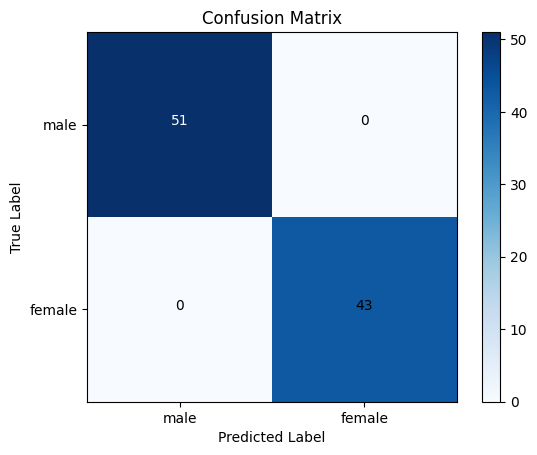

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# define the list of unique class labels
classes = ['male', 'female']

# make predictions on the testing dataset
y_pred = clf.predict(X_test)

# generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, cm[i, j], horizontalalignment='center', 
                 color='white' if cm[i, j] > len(X_test)/2 else 'black')

plt.show()


In [16]:
from sklearn.metrics import classification_report

# make predictions on the testing dataset
y_pred = clf.predict(X_test)

# generate a classification report
report = classification_report(y_test, y_pred)

# print the classification report
print(report)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        43

    accuracy                           1.00        94
   macro avg       1.00      1.00      1.00        94
weighted avg       1.00      1.00      1.00        94

Accuracy: 1.0
